Importing libraries


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


In [32]:
#Reading Data
df = pd.read_csv("diabetes.csv")


In [33]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Exploring, understanding the data


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


I've observed that our dataset has a shape of (768, 9), which is a good start. All the columns are numerical, and there are no missing values (NaNs). However, it appears that there are some unusual values in the columns "Glucose," "BloodPressure," "Insulin," "SkinThickness," and "BMI." I will treat these unexpected values as if they were missing data.






In [38]:
zero_columns = df.columns[(df == 0).any()]


In [39]:
print("Columns with zero values:", zero_columns)


Columns with zero values: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Outcome'],
      dtype='object')


In [40]:
zero_count = (df == 0).sum()
print(zero_count)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


There are columns that must not have values ​​equal to zero ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI'),so we wiil replace zero values with nan value



In [41]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [42]:
zero_count = (df == 0).sum()
print(zero_count)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [43]:
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)


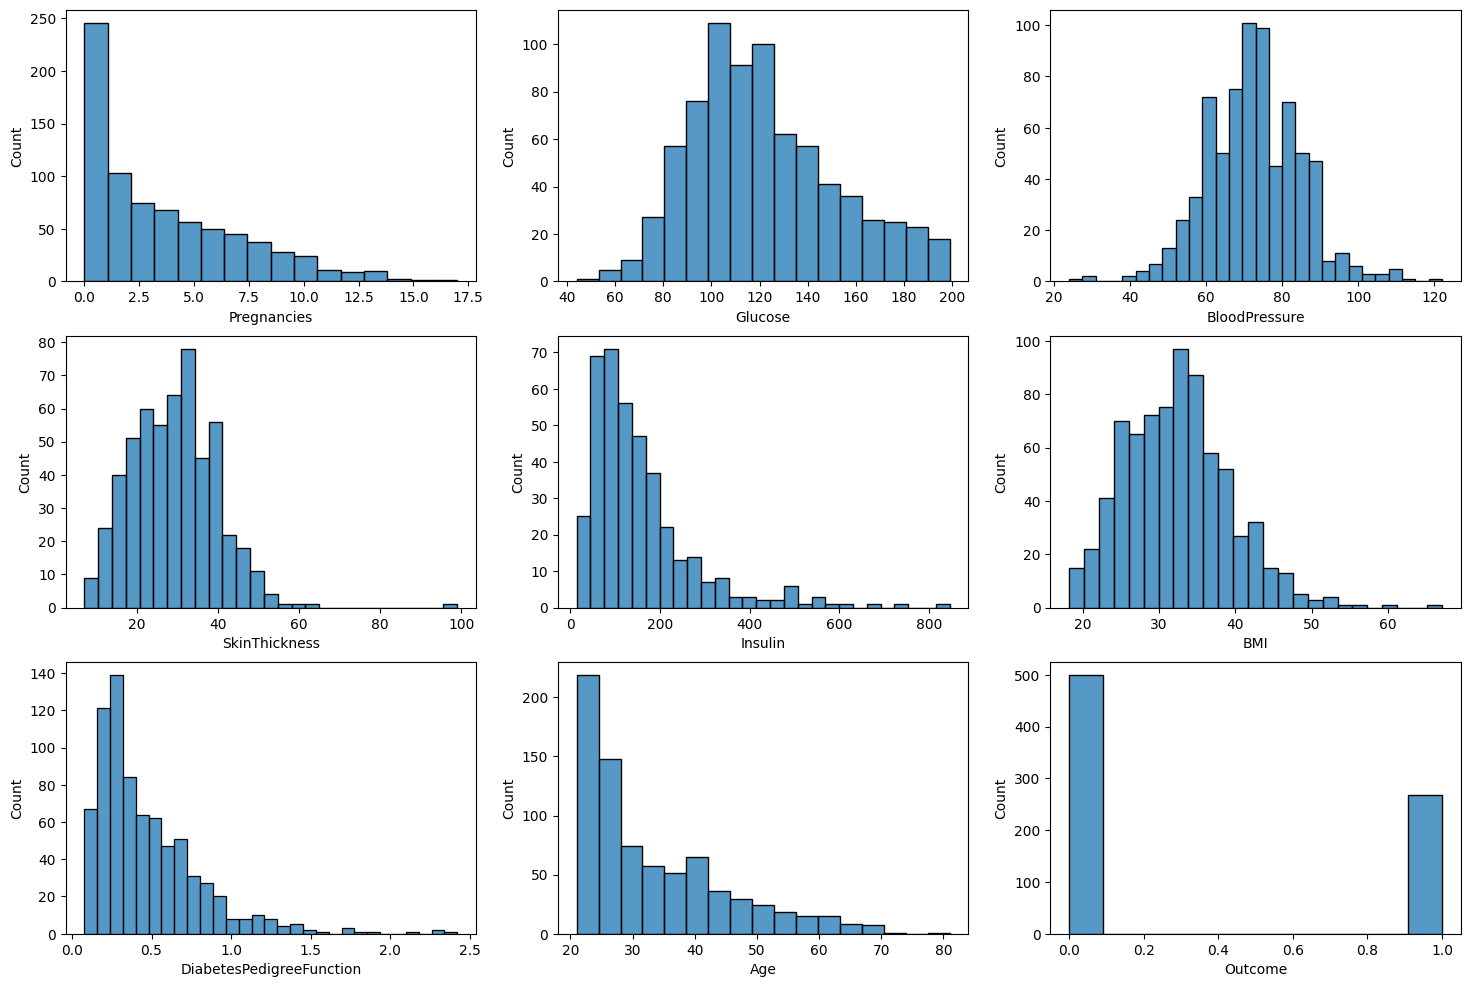

In [44]:
#Visualization
%matplotlib inline
fig, ax = plt.subplots(3,3,figsize=(18,12))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=False ,ax=ax[i//3, i%3])

plt.show()


('Glucose', 'BloodPressure', 'BMI') These columns have a normal distribution,so we will impute it by (median or mean)

('SkinThickness', 'Insulin') These columns have a skweed to right ,so we will impute it by (median)

We will fill the empty values ​​with the median

In [45]:
Column_Name = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in Column_Name:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

In [46]:
df.isnull().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


outliers



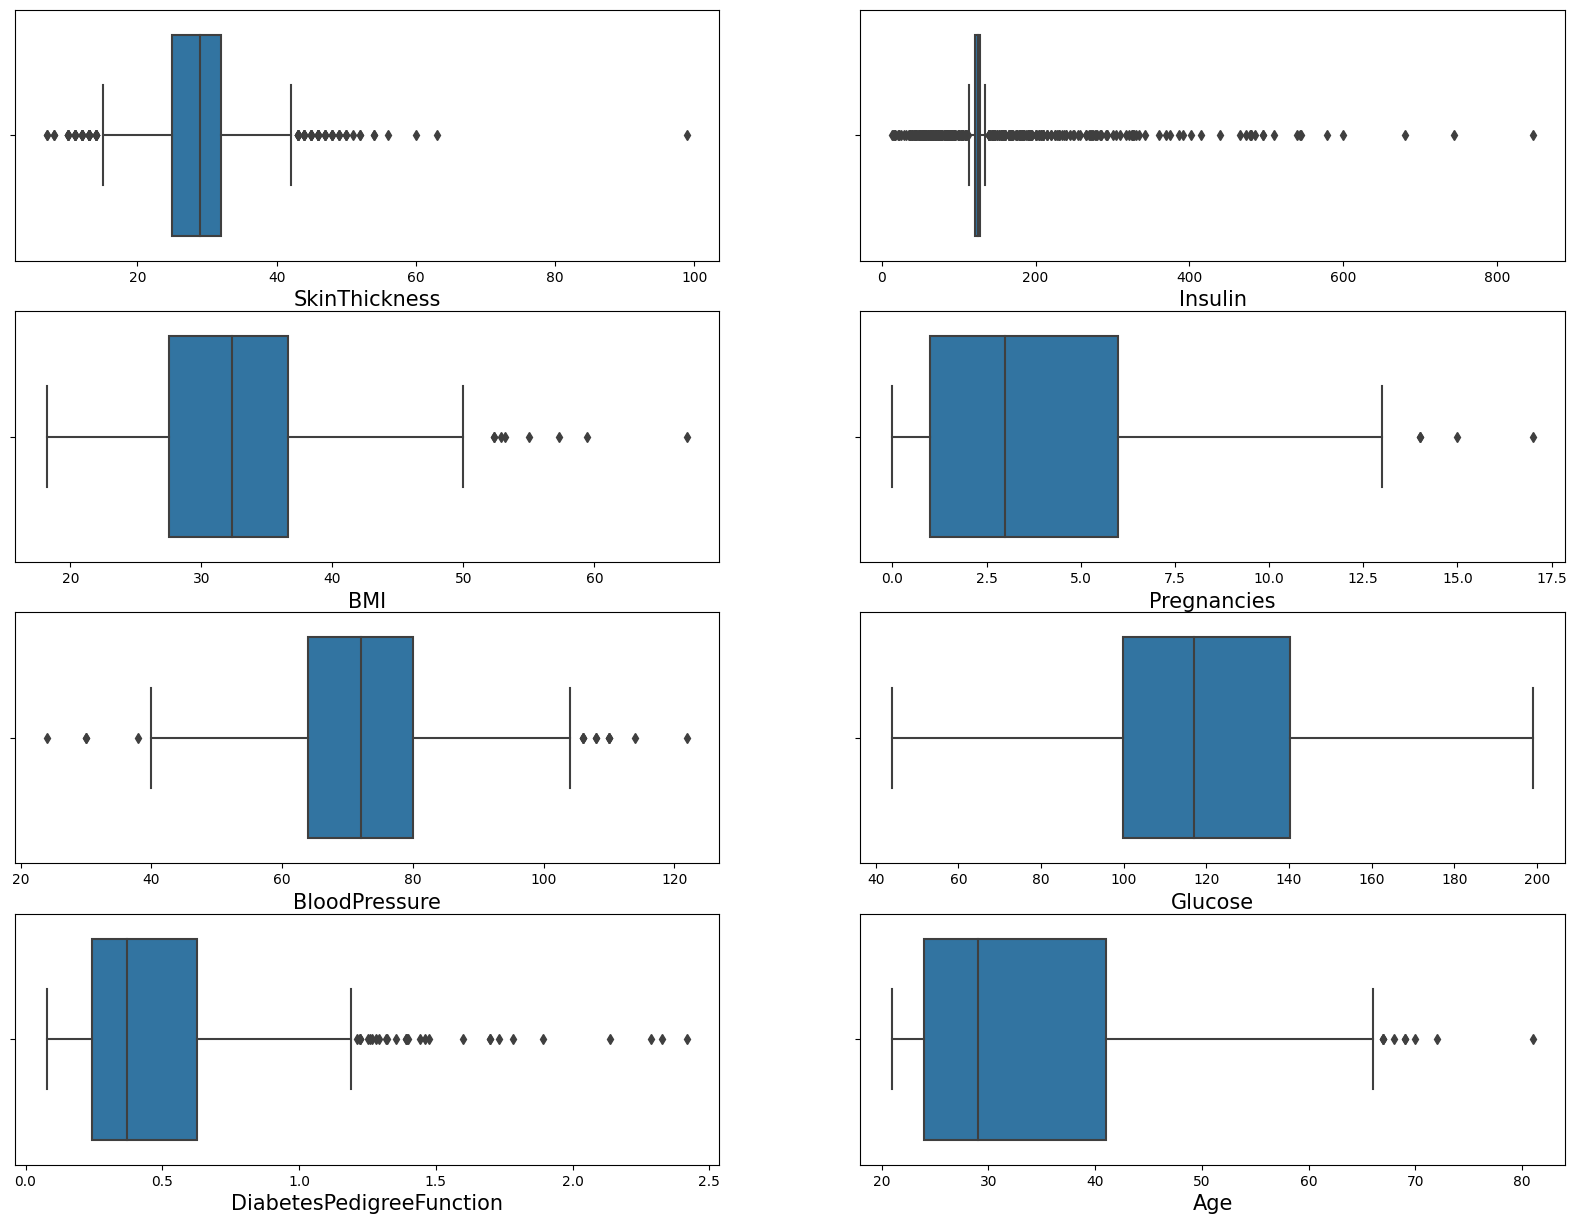

In [47]:
# detect outliers by boxplot visualization
plt.figure(figsize=(20,15))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)


In [48]:
#outliers detecting
def detect_outliers(df):
    outliers= pd.DataFrame(columns=["concave points_mean","perimeter_worst","perimeter_mean","area_mean","texture_worst","area_worst","concavity_worst","fractal_dimension_worst"])
    for col in list(set(df.select_dtypes(include=np.number).columns)-{'Outcome'}):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        N_O_O = df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]

        df.loc[(df[col] < fence_low),col] = fence_low
        df.loc[(df[col] > fence_high),col] = fence_high
        #let's fix them
        #df[col] = np.where((df[col] > fence_high) | (df[col] > fence_high),df[col].median(),df[col])
        outliers = outliers.append({'Feature': col, "NO Outliers": N_O_O ,"Handled?": df[col].all() < fence_high},ignore_index=True)
    return outliers
detect_outliers(df)

<ipython-input-48-b8c8fdf79a4b>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Feature': col, "NO Outliers": N_O_O ,"Handled?": df[col].all() < fence_high},ignore_index=True)
<ipython-input-48-b8c8fdf79a4b>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Feature': col, "NO Outliers": N_O_O ,"Handled?": df[col].all() < fence_high},ignore_index=True)
<ipython-input-48-b8c8fdf79a4b>:16: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  outliers = outliers.append({'Feature': col, "NO Outliers": N_O_O ,"Handled?": df[col].all() < fence_high},ignore_index=True)
<ipython-input-48-b8c8fdf79a4b>:16: FutureWarning: The frame.append meth

,concave points_mean,perimeter_worst,perimeter_mean,area_mean,texture_worst,area_worst,concavity_worst,fractal_dimension_worst,Feature,NO Outliers,Handled?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SkinThickness,87.0,True
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Insulin,346.0,True
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMI,8.0,True
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pregnancies,4.0,True
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BloodPressure,14.0,True
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glucose,0.0,True
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DiabetesPedigreeFunction,29.0,True
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Age,9.0,True


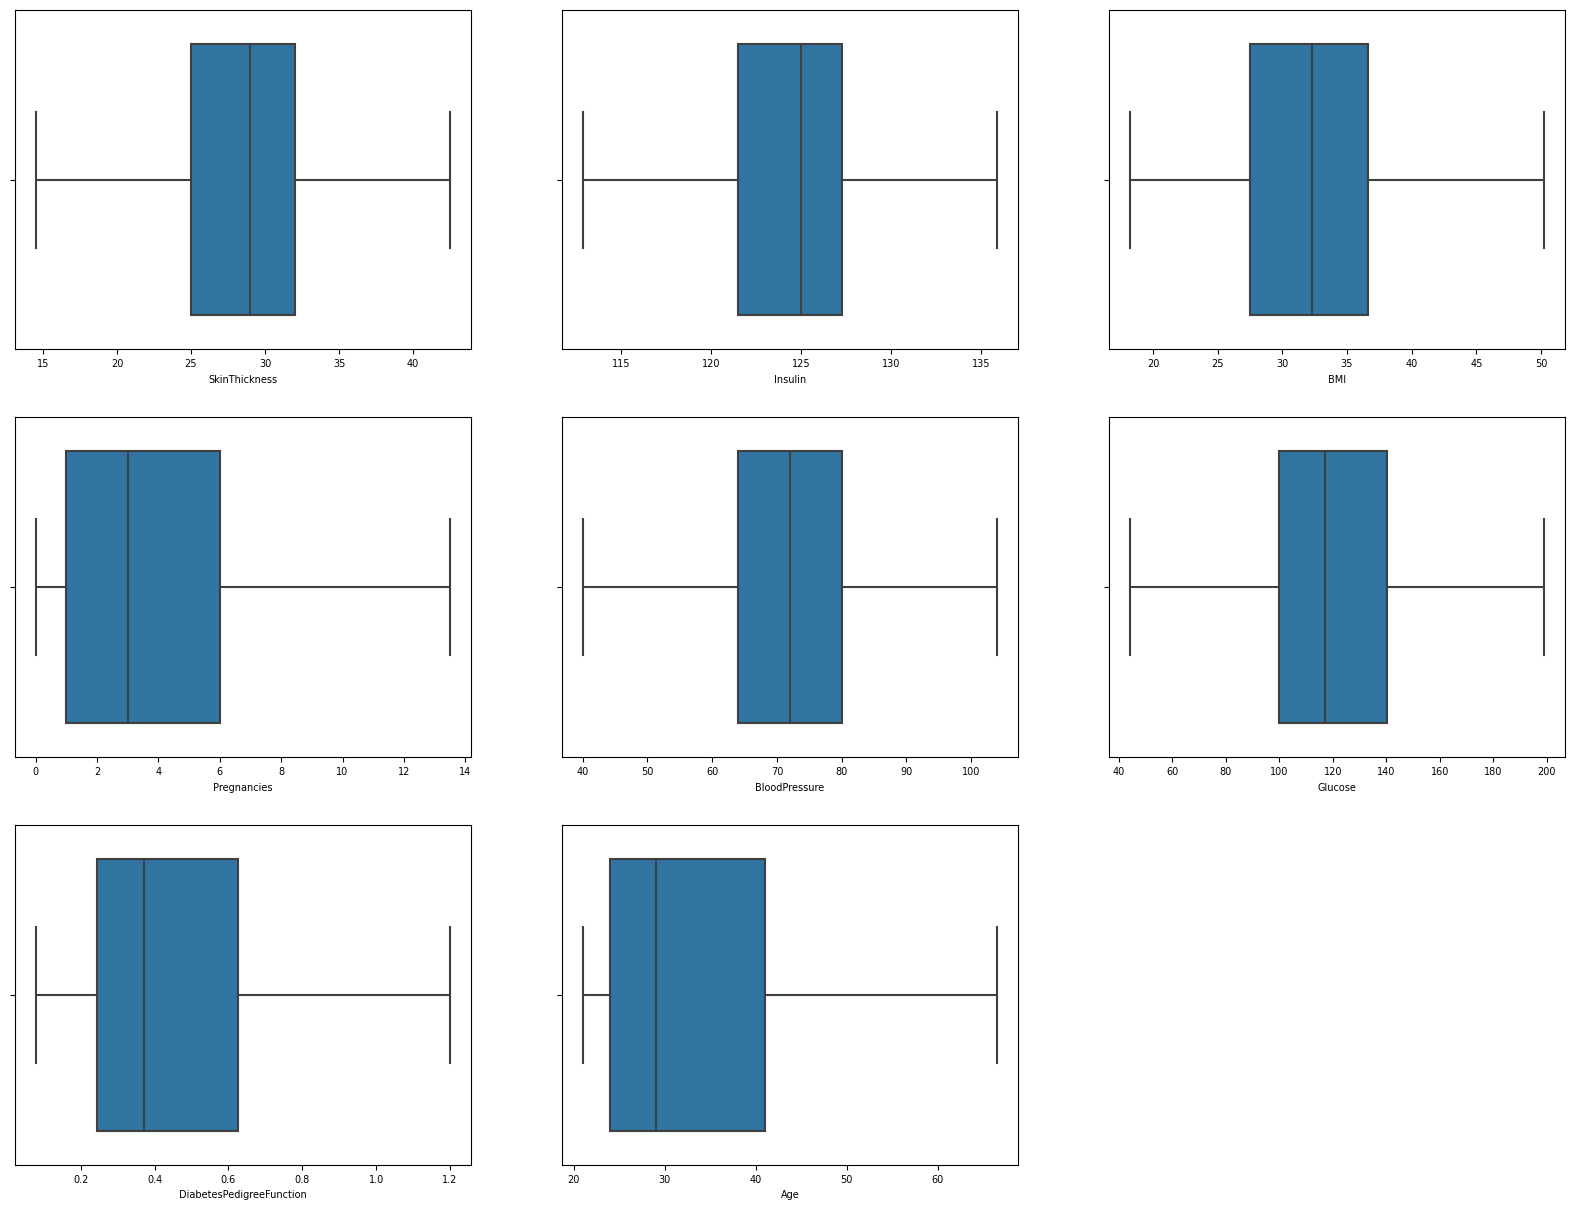

In [49]:
plt.figure(figsize=(20,15))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df,x=col)
    plt.xlabel(col, fontsize=7)
    plt.xticks(fontsize=7)


Modeling


In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1


In [51]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]


In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)


In [53]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
118,4.0,97.0,60.0,23.0,125.000,28.2,0.443,22.0
336,0.0,117.0,72.0,29.0,125.000,33.8,0.932,44.0
374,2.0,122.0,52.0,42.5,135.875,36.2,0.816,28.0
518,13.0,76.0,60.0,29.0,125.000,32.8,0.180,41.0
716,3.0,173.0,78.0,39.0,135.875,33.8,0.970,31.0
...,...,...,...,...,...,...,...,...
317,3.0,182.0,74.0,29.0,125.000,30.5,0.345,29.0
143,10.0,108.0,66.0,29.0,125.000,32.4,0.272,42.0
474,4.0,114.0,64.0,29.0,125.000,28.9,0.126,24.0
318,3.0,115.0,66.0,39.0,135.875,38.1,0.150,28.0


In [54]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
459,9.0,134.0,74.0,33.0,112.875,25.9,0.460,66.5
39,4.0,111.0,72.0,42.5,135.875,37.1,1.200,56.0
344,8.0,95.0,72.0,29.0,125.000,36.8,0.485,57.0
84,5.0,137.0,104.0,29.0,125.000,48.8,0.227,37.0
700,2.0,122.0,76.0,27.0,135.875,35.9,0.483,26.0
...,...,...,...,...,...,...,...,...
410,6.0,102.0,90.0,39.0,125.000,35.7,0.674,28.0
114,7.0,160.0,54.0,32.0,135.875,30.5,0.588,39.0
246,10.0,122.0,68.0,29.0,125.000,31.2,0.258,41.0
506,0.0,180.0,90.0,26.0,112.875,36.5,0.314,35.0


scalling Data


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
model_params={
    "svm":{
        'model': SVC(gamma="auto",random_state=0),
        'params':{
            'C':[1,10,20],
            'kernel': ["linear","rbf"]
        }
    },
    "random_forest":{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [1,10,20]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear'),
        'params':{
            'C': [1,5,10]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(random_state=0),
        'params':{
             'max_depth':[3,4,5]
        }
    },
    "gradient_boosting":{
        'model': GradientBoostingClassifier(),
        'params':{
            'max_depth':[3,4,5],
            'n_estimators':[1,5,10]
        }

    },
    "MLPClassifier":{
        'model': MLPClassifier(max_iter=1000,random_state=0),
        'params':{
            'activation':['logistic','relu']
        }
    }
}

In [57]:
# try each model with the original data
scores = []
for mn,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model' : mn,
        'best score': clf.best_score_,
        "best params": clf.best_params_,
    })

df1 = pd.DataFrame(scores, columns=["model","best score",'best params'])
df1.sort_values(by=['best score'], ascending=False)

,model,best score,best params
0,svm,0.762242,"{'C': 1, 'kernel': 'linear'}"
2,logistic_regression,0.758976,{'C': 1}
5,MLPClassifier,0.745928,{'activation': 'logistic'}
4,gradient_boosting,0.739371,"{'max_depth': 4, 'n_estimators': 10}"
1,random_forest,0.734533,{'n_estimators': 10}
3,decision_tree,0.701959,{'max_depth': 3}


In [58]:
# try each model with the scaled data
scores_scaled = []
for mn,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train_scaled,y_train)
    scores_scaled.append({
        'model' : mn,
        'best score': clf.best_score_,
        "best params": clf.best_params_
    })

df2 = pd.DataFrame(scores_scaled, columns=["model","best score",'best params'])
df2.sort_values(by=['best score'], ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

,model,best score,best params
0,svm,0.763868,"{'C': 10, 'kernel': 'linear'}"
5,MLPClassifier,0.763828,{'activation': 'logistic'}
2,logistic_regression,0.758963,{'C': 1}
4,gradient_boosting,0.736159,"{'max_depth': 3, 'n_estimators': 10}"
1,random_forest,0.724777,{'n_estimators': 10}
3,decision_tree,0.701959,{'max_depth': 3}



As we've observed, scaling the data has had minimal impact on the performance of various machine learning models, with the exception of MLPClassifier. Despite this, SVM remains the top-performing mode


Modeling Conclusion

We can see the best model is the SVM

the best parameters are {'C': 10, 'kernel': 'linear'}


it's Accurcy 76.3868%